In [1]:
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage,dendrogram
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13098\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
PAPERS_COLUMNS_TO_DROP = ['DOI', 'PMID', 'PMCID','Acknowledgements','Anthology title','Publisher',
       'MeSH terms', 'PubYear', 'Publication Date (online)',
       'Publication Date (print)', 'Volume', 'Issue', 'Pagination',
       'Open Access', 'Publication Type',
       'Authors (Raw Affiliation)', 'Corresponding Author',
       'Authors Affiliations', 'Research Organizations - standardized',
       'GRID IDs', 'City of Research organization',
       'State of Research organization', 'Country of Research organization',
       'Funder', 'Funder Group', 'Funder Country', 'UIDs of supporting grants',
       'Supporting Grants', 'Recent citations', 'RCR', 'FCR',
       'Altmetric',
       'FOR (ANZSRC) Categories', 'RCDC Categories', 'HRCS HC Categories',
       'HRCS RAC Categories', 'ICRP Cancer Types', 'ICRP CSO Categories',
       'Units of Assessment', 'Sustainable Development Goals']
def allign_column_names(df):
  ''' This function remove sthe extra column in the research papers dataset and allign the index to proper columns,\n
      take one required parameter dataframe which needs to be procesed'''
  new_header = df.iloc[0]
  df = df[1:]
  df.columns = new_header
  return df


def drop_columns(df,drop_columns = []):
  df = df.drop(columns = drop_columns)
  df = df.dropna(subset=['Abstract'])
  return df


NLP_df = drop_columns(allign_column_names(pd.read_csv("NLP_papers.csv")),drop_columns=PAPERS_COLUMNS_TO_DROP)
nlp_jobs = pd.read_csv("./Jobs dataset/NLP_jobs_USA (few full_desc filled).csv")
print(NLP_df.columns)

print(nlp_jobs.columns)

Index(['Rank', 'Publication ID', 'Title', 'Abstract', 'Source title',
       'Authors', 'Times cited', 'Source Linkout', 'Dimensions URL'],
      dtype='object', name=0)
Index(['Unnamed: 0', 'JobTitle', 'Company', 'Location', 'Summary', 'Salary',
       'PostDate', 'JobUrl', 'full_desc'],
      dtype='object')


C:\Users\13098\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (0,3,11,12,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [9]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in NLP_df["Abstract"]])
tfidf_matrix_jobs = tfidf_vectorizer.transform([x for x in nlp_jobs["Summary"]])

# tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in nlp_jobs["Summary"]])

In [10]:
    # km = KMeans(n_clusters=5)

    # # Fit the k-means object with tfidf_matrix
    # km.fit(tfidf_matrix,)

    # clusters = km.labels_.tolist()

    # # Create a column cluster to denote the generated cluster for each movie
    # NLP_df["cluster"] = clusters

    # # Display number of films per cluster (clusters from 0 to 4)
    # movies_df['cluster'].value_counts() 

similarity_distance = 1 - cosine_similarity(tfidf_matrix, tfidf_matrix_jobs) #,tfidf_matrix_jobs

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

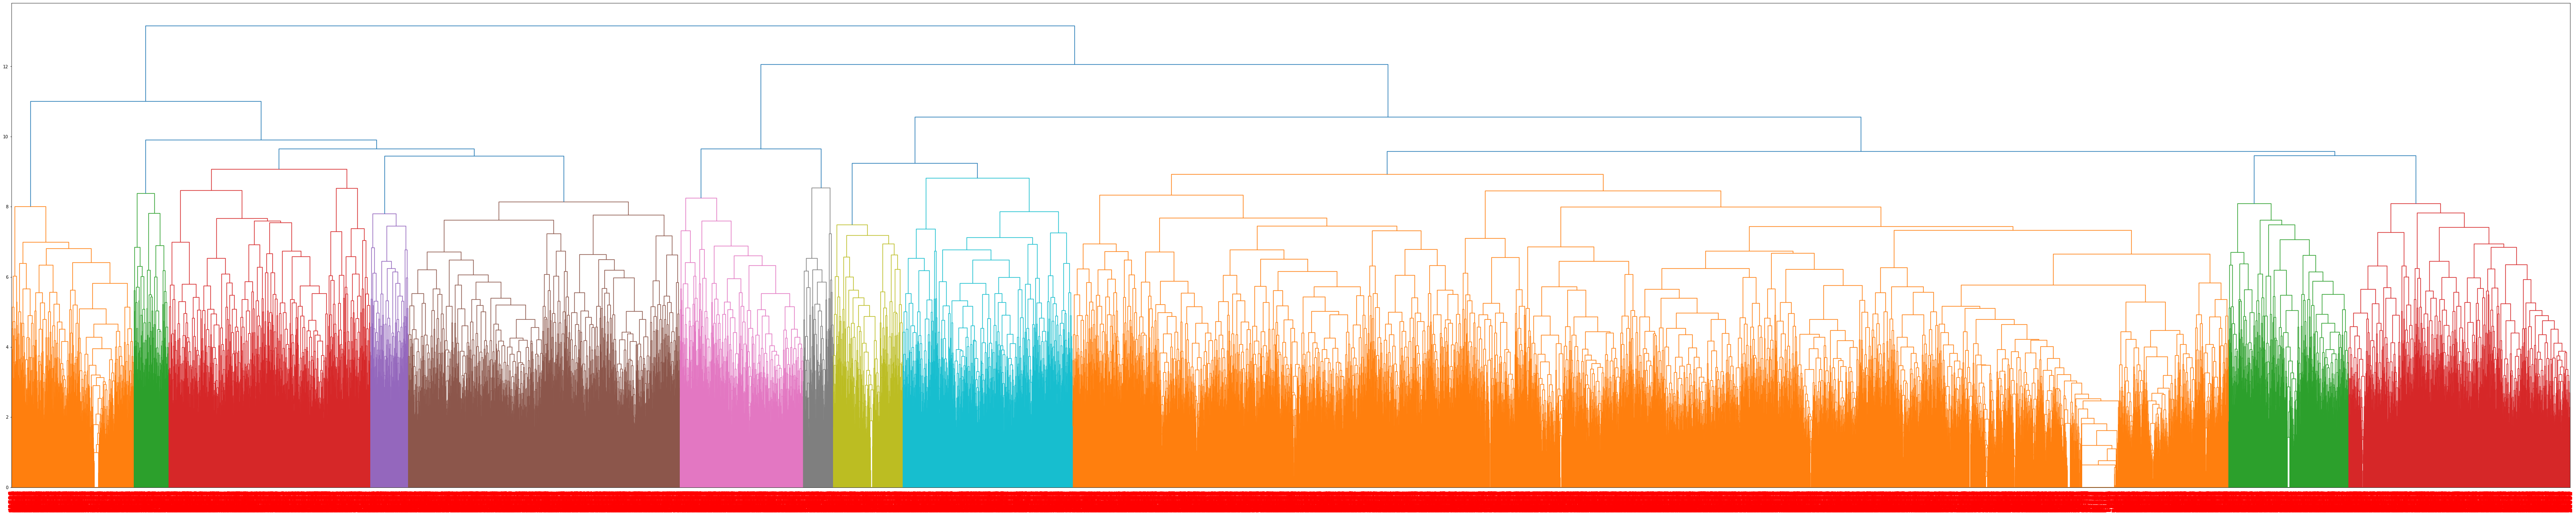

In [19]:
# Create mergings matrix 
%matplotlib inline
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
            #    labels=[x for x in NLP_df["Title"]], #NLP_df["Title"]
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()